## Iris Dataset Clustering using k-Means and Classification using kNN

In [120]:
import time
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from keras.datasets import mnist
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

In [121]:
(train_x, y_train), (test_x, y_test) = mnist.load_data()

x_train = train_x.astype('float32') / 255.
x_test = test_x.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


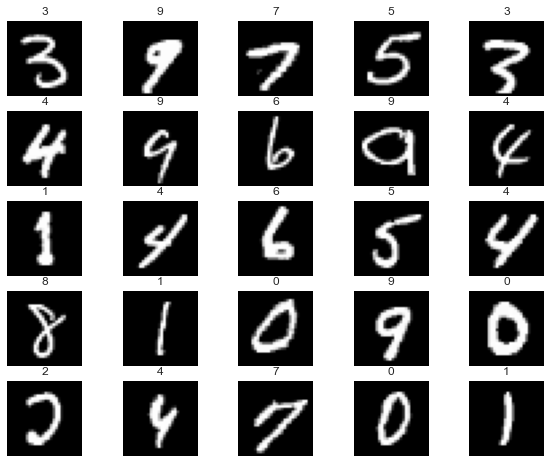

In [122]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_x), size=(1,)).item()
    img = train_x[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(y_train[sample_idx])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [123]:
k_cluster = 10

start1 = time.perf_counter()
k_means = KMeans(n_clusters=k_cluster, random_state=0)
k_means.fit(x_train, y_train)
end1 = time.perf_counter() - start1

centers = k_means.cluster_centers_
labels = k_means.labels_

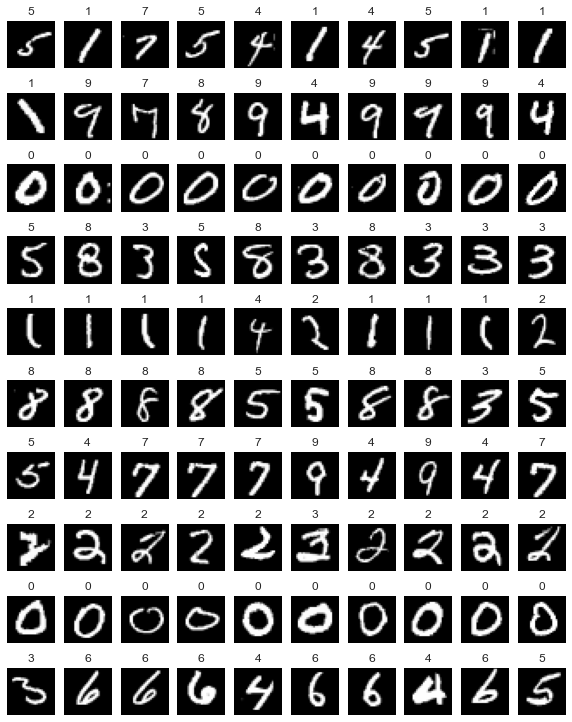

In [124]:
figure = plt.figure(figsize=(10, 13))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
    sample_idx = np.where(labels == (i-1)//10)[0][i]
    img = train_x[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(y_train[sample_idx])
    plt.xlabel
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [125]:
comparison_acc = []
comparison_time = []

## kNN

In [126]:
# kNN
k_neighbors = 1

knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
knn.fit(x_train, y_train)

start = time.perf_counter()
test_score = knn.score(x_test, y_test)
end = time.perf_counter() - start

comparison_acc.append(test_score)
comparison_time.append(end)

print("PC - kNN Average Accuracy : %f" % test_score)
print("PC - kNN Classification Time : %.4f" % end, "sec")

PC - kNN Average Accuracy : 0.969100
PC - kNN Classification Time : 8.8605 sec


## NCM

In [127]:
nc = NearestCentroid()
nc.fit(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

comparison_acc.append(test_score)
comparison_time.append(end)

print("PC - kNN Average Accuracy : %f" % test_score)
print("PC - kNN Classification Time : %.4f" % end, "sec")

PC - kNN Average Accuracy : 0.820300
PC - kNN Classification Time : 0.0379 sec


## k-Means & kNN

In [128]:
# k-Means & kNN
avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    k_cluster = 10

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")

PC - k-means & kNN Average Accuracy : 0.538460
PC - Clustering Time : 20.9594 sec
PC - Classification Time : 0.1336 sec
PC - Total Time : 21.0930 sec


## PCA Feature 3 & k-Means & kNN

In [129]:
# PCA feature 3 & k-means & kNN
pca = PCA(n_components=3)
x_train = pca.fit(x_train).transform(x_train)
x_test = pca.fit(x_test).transform(x_test)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    k_cluster = 100

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 3 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 3 & k-means & kNN Average Accuracy : 0.138200
PC - Clustering Time : 24.7808 sec
PC - Classification Time : 0.0184 sec
PC - Total Time : 24.7992 sec


## PCA Feature 2 & k-Means & kNN

In [130]:
# PCA feature 3 & k-means & kNN
pca = PCA(n_components=2)
x_train = pca.fit(x_train).transform(x_train)
x_test = pca.fit(x_test).transform(x_test)

avg_acc = []
avg_cluster_time = []
avg_classification_time = []

max_seed = 10

for seed in range(max_seed):
    k_cluster = 10

    start1 = time.perf_counter()
    k_means = KMeans(n_clusters=k_cluster, random_state=seed)
    k_means.fit(x_train, y_train)
    end1 = time.perf_counter() - start1

    centers = k_means.cluster_centers_
    labels = k_means.labels_
    centers_label = []

    for c in range(k_cluster):
        label_index = np.where(labels == c)
        idx = label_index[0]
        counter = Counter(y_train[idx])
        counter = dict(counter)
        label_list = list(counter)[0]
        centers_label.append(label_list)

    knn = KNeighborsClassifier(k_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, centers_label)

    start2 = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end2 = time.perf_counter() - start2

    avg_acc.append(test_score)
    avg_cluster_time.append(end1)
    avg_classification_time.append(end2)

mean_acc = np.array(avg_acc).mean()
mean_cluster_time = np.array(avg_cluster_time).mean()
mean_classification_time = np.array(avg_classification_time).mean()

comparison_acc.append(mean_acc)
comparison_time.append(mean_cluster_time)
comparison_time.append(mean_classification_time)

print("PC - PCA feautre 2 & k-means & kNN Average Accuracy : %f" % mean_acc)
print("PC - Clustering Time : %.4f" % mean_cluster_time, "sec")
print("PC - Classification Time : %.4f" % mean_classification_time, "sec")
print("PC - Total Time : %.4f" % (mean_cluster_time + mean_classification_time), "sec")


PC - PCA feautre 2 & k-means & kNN Average Accuracy : 0.105730
PC - Clustering Time : 1.5253 sec
PC - Classification Time : 0.0114 sec
PC - Total Time : 1.5367 sec


## Method Comparison

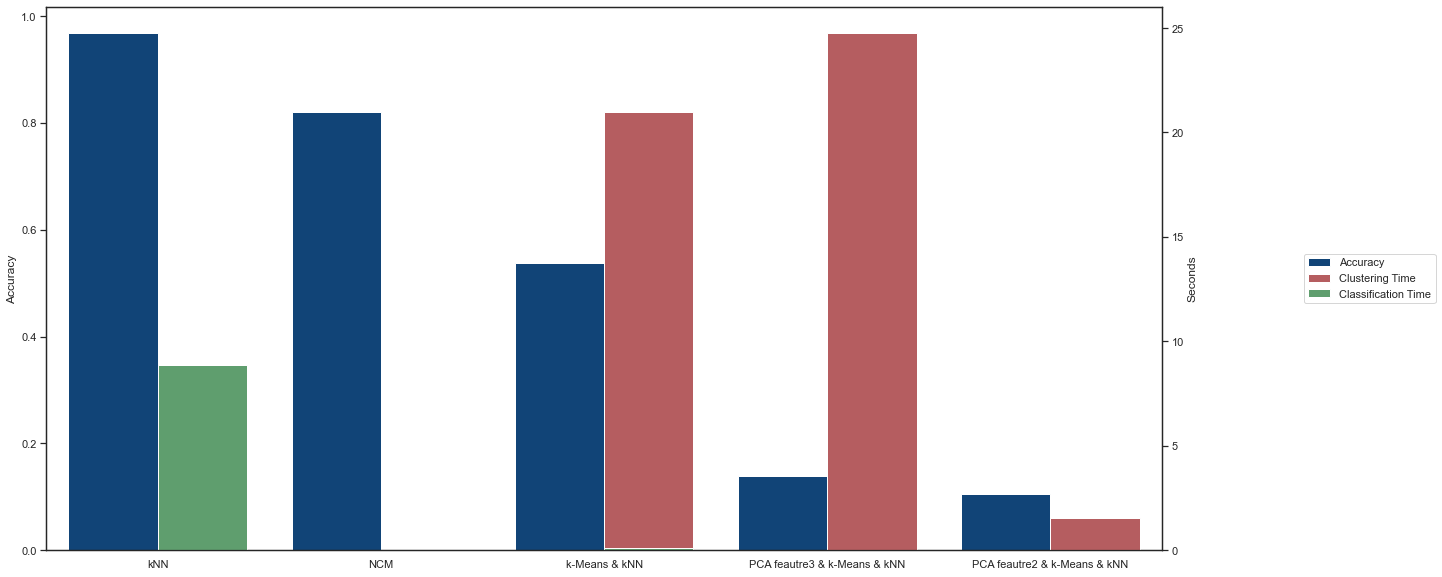

In [132]:
df_stack = pd.DataFrame(dict(
    score = [comparison_acc[0], comparison_acc[1], comparison_acc[2], comparison_acc[3], comparison_acc[4]],
    cluster = [0, 0, comparison_time[2], comparison_time[4], comparison_time[6]],
    # cluster = [0, 0, 0, 0, 0],
    classifier = [comparison_time[0], comparison_time[1], comparison_time[3], comparison_time[5], comparison_time[7]]
))

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

sns.barplot(x=["kNN", "NCM", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"],
            y="score",
            data=df_stack,
            label="Accuracy",
            color='#004488',
            ax=ax1)

sns.barplot(x=["kNN", "NCM", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="cluster",
            data=df_stack,
            label="Clustering Time",
            color='r',
            ax=ax2)

sns.barplot(x=["kNN", "NCM", "k-Means & kNN", "PCA feautre3 & k-Means & kNN", "PCA feautre2 & k-Means & kNN"], 
            y="classifier",
            data=df_stack,
            label="Classification Time",
            color='g',
            ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

width_scale = 0.5

for bar in ax1.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

for bar_containers in ax2.containers:
    for bar in bar_containers:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)

plt.legend(lines, labels, loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()
sns.set()